In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle

# acquire data 
df = wrangle.get_zillow_data()

In [2]:
# Take a look at the data

df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,11721753,616260,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,...,205123.0,2016.0,163175.0,2627.48,None,NaN,6.037220e+13,1018,0.017785,2017-07-21
1,11289917,2061546,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
2,11705026,1834372,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,1772,-0.146056,2017-06-30
3,14269464,1923117,NaN,NaN,NaN,3.0,4.0,None,NaN,3.0,...,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,2028,0.021085,2017-06-01
4,11446756,451211,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,...,107110.0,2016.0,46573.0,1399.27,None,NaN,6.037650e+13,2681,-0.163064,2017-08-23


In [3]:
# Looking at the columns with more detail

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 62 columns):
parcelid                        7000 non-null int64
id                              7000 non-null int64
airconditioningtypeid           1832 non-null float64
architecturalstyletypeid        8 non-null float64
basementsqft                    5 non-null float64
bathroomcnt                     7000 non-null float64
bedroomcnt                      7000 non-null float64
buildingclasstypeid             0 non-null object
buildingqualitytypeid           4473 non-null float64
calculatedbathnbr               6977 non-null float64
decktypeid                      50 non-null float64
finishedfloor1squarefeet        559 non-null float64
calculatedfinishedsquarefeet    6990 non-null float64
finishedsquarefeet12            6969 non-null float64
finishedsquarefeet13            0 non-null object
finishedsquarefeet15            0 non-null object
finishedsquarefeet50            559 non-null float64
f

In [4]:
# df = df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "calculatedfinishedsquarefeet": "square_feet", 
#                        "taxamount": "taxes", "regionidzip": "zip_code", "taxvaluedollarcnt": "tax_value", 
#                        "yearbuilt": "year_built", "regionidcounty": "county"})

In [5]:
df = wrangle.clean_zillow(df)

In [6]:
df.isnull().sum()

id                               0
bathrooms                        0
bedrooms                         0
buildingclasstypeid           6281
buildingqualitytypeid         2206
calculatedbathnbr               12
decktypeid                    6245
finishedfloor1squarefeet      5769
square_feet                      0
finishedsquarefeet12            18
finishedsquarefeet13          6281
finishedsquarefeet15          6281
finishedsquarefeet50          5769
finishedsquarefeet6           6263
fips                             0
fireplacecnt                  5417
fullbathcnt                     12
garagecarcnt                  4150
garagetotalsqft               4150
hashottuborspa                6159
heatingorsystemtypeid         2196
latitude                         0
longitude                        0
lotsizesquarefeet               26
poolcnt                       5092
poolsizesum                   6198
pooltypeid10                  6236
pooltypeid2                   6204
pooltypeid7         

In [7]:
features = [
    "bedrooms",
    "bathrooms",
    "square_feet",
    "tax_value"    
]

df = df[features]
df.head()

,bedrooms,bathrooms,square_feet,tax_value
parcelid,,,,
11721753,3.0,2.0,1316.0,205123.0
11289917,3.0,2.0,1458.0,136104.0
11705026,2.0,1.0,1421.0,35606.0
14269464,4.0,3.0,2541.0,880456.0
11446756,3.0,2.0,1491.0,107110.0


In [8]:
df.corr()

,bedrooms,bathrooms,square_feet,tax_value
bedrooms,1.000000,0.596457,0.625122,0.215432
bathrooms,0.596457,1.000000,0.783341,0.401319
square_feet,0.625122,0.783341,1.000000,0.474418
tax_value,0.215432,0.401319,0.474418,1.000000


In [9]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

bedrooms 8 [3. 2. 4. 0. 5. 6. 1. 7.]
bathrooms 13 [2.  1.  3.  0.  2.5 1.5 4.  3.5 4.5 5.  7.  6.  5.5]
square_feet 2178 [1316. 1458. 1421. ... 2254. 3236. 2127.]
tax_value 5742 [205123. 136104.  35606. ... 103000. 240189. 308859.]


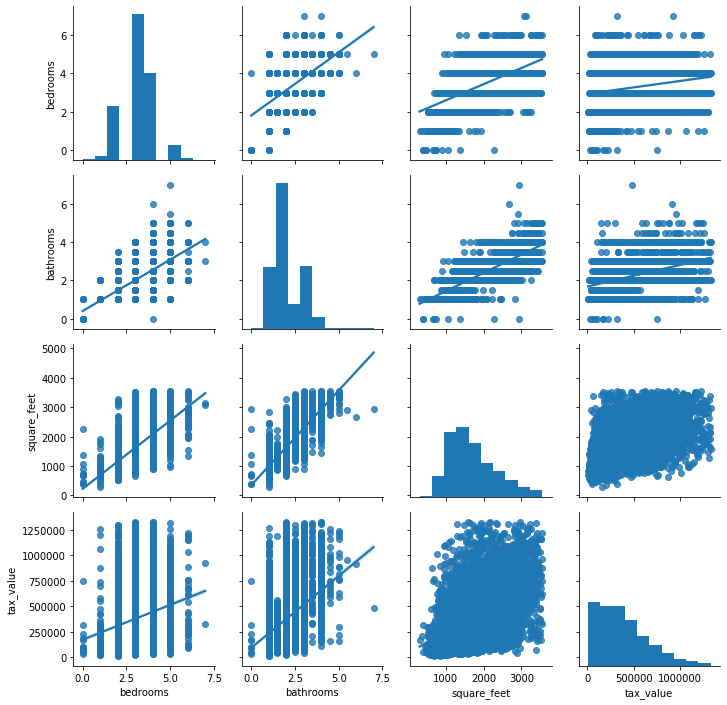

In [10]:
def plot_variable_pairs():
    g = sns.PairGrid(df)
    g.map_diag(plt.hist)
    g.map_offdiag(sns.regplot)
    return g

plot_variable_pairs()

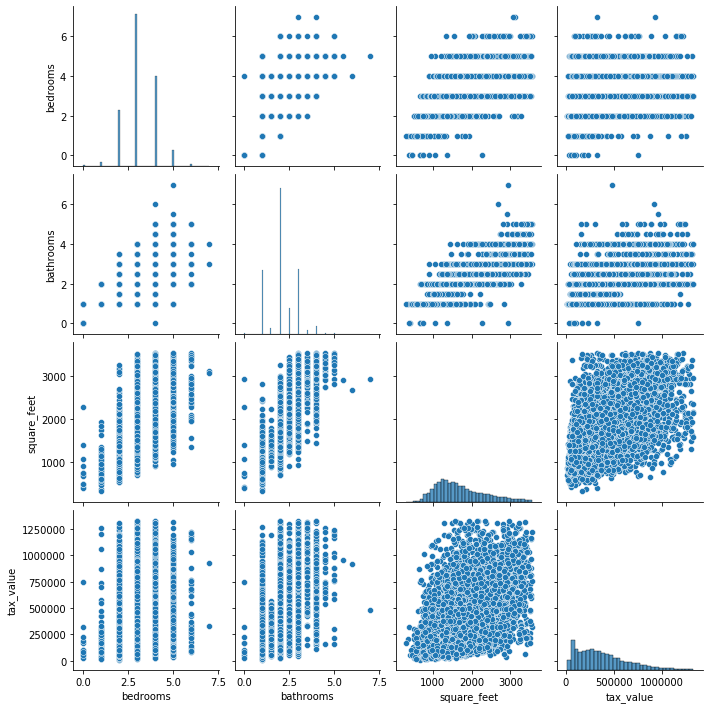

In [11]:
sns.pairplot(df)

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.ylim(0, 9)

In [ ]:
with sns.axes_style('white'):
    j = sns.jointplot("square_feet", "tax_value", data=df, kind='reg', height=7);
plt.show()

In [ ]:
# Construct a figure with subplots of histograms of features

# sets size, can adjust to liking
plt.subplots(figsize=(25, 15))

plt.subplot(221)
sns.boxplot(df.square_feet)

plt.subplot(222)
sns.boxplot(df.bedrooms)

plt.subplot(223)
sns.boxplot(df.bathrooms)
